# Salary Predictions Based upon Job Descriptions

# Part 1 - DEFINE

## ---- 1 Define the problem ----

The main object of this assignment is to examine a set of job postings with salaries and then predict salaries for a new set of job postings. The model will decide the remunerations for present as well as future employees of any organization.

With the help of Machine Learning, salaries will be forecasted depending upon years of experience, job type, college degree, college major, industry, and miles from a metropolis.

The raw data comprises training and test dataset in which training set has aforementioned attribues with the corresponding salaries while test dataset does not have salary information and would act as a real-world dataset.

The features of the datasets:

> - **Years Experience:** How many years of experience any person has.<br>
> - **Job Type:** The position held (CEO, CFO, CTO, Vice President, Manager, Senior, Junior, Janitor).<br>
> - **Degree:** Doctoral, Masters, Bachelors, High School, or None.<br>
> - **Major:** Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None.<br>
> - **Industry:** Auto, Education, Finance, Health, Oil, Service, or Web.<br>
> - **Miles From Metropolis:** How many miles of commuting.<br>

# Part 2 - DISCOVER

##  ---- 2 Load the data ----

In [1]:
#import your libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#load the raw data into a Pandas dataframe
train_feature = pd.read_csv("/content/train_features.csv")
train_target = pd.read_csv("/content/train_salaries.csv")
test_feature = pd.read_csv("/content/test_features.csv")

### Examine the data

In [3]:
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_target.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### Use .info() to check the length and datatypes

In [6]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
test_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


## ---- 3 Clean the data ----

### Check for any duplicates

In [9]:
train_feature.duplicated().sum()

0

In [10]:
train_target.duplicated().sum()

0

In [11]:
test_feature.duplicated().sum()

0

### Identify numerical and categorical features

In [12]:
train_feature.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
numeric_cols = ["yearsExperience", "milesFromMetropolis"]

In [14]:
categorical_cols = ["jobId", "companyId", "jobType", "degree", "major", "industry"]

### Summarize numeric and categorical variables

In [15]:
train_feature.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [16]:
train_feature.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685407647,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merge attributes and outcome in one dataframe

In [17]:
# Merge the features and target on jobId
train_df = pd.merge(train_feature, train_target, on ='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [18]:
# Check length and datatypes of new dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


### Check for missing data

In [19]:
missing_data = train_df.isnull().sum()
missing_data

,0
jobId,0
companyId,0
jobType,0
degree,0
major,0
industry,0
yearsExperience,0
milesFromMetropolis,0
salary,0


In [20]:
# Convert the object into categorical data

train_df["jobId"]=pd.Categorical(train_df["jobId"])
train_df["companyId"]=pd.Categorical(train_df["companyId"])
train_df["jobType"]=pd.Categorical(train_df["jobType"])
train_df["degree"]=pd.Categorical(train_df["degree"])
train_df["major"]=pd.Categorical(train_df["major"])
train_df["industry"]=pd.Categorical(train_df["industry"])
train_df.dtypes

,0
jobId,category
companyId,category
jobType,category
degree,category
major,category
industry,category
yearsExperience,int64
milesFromMetropolis,int64
salary,int64


## ---- 4 Explore the data (EDA) ----

### Summarize the features and target variables

In [21]:
# Descriptive statistics of train data
train_df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [22]:
# Unique value in the data
train_df.nunique()

,0
jobId,1000000
companyId,63
jobType,8
degree,5
major,9
industry,7
yearsExperience,25
milesFromMetropolis,100
salary,280


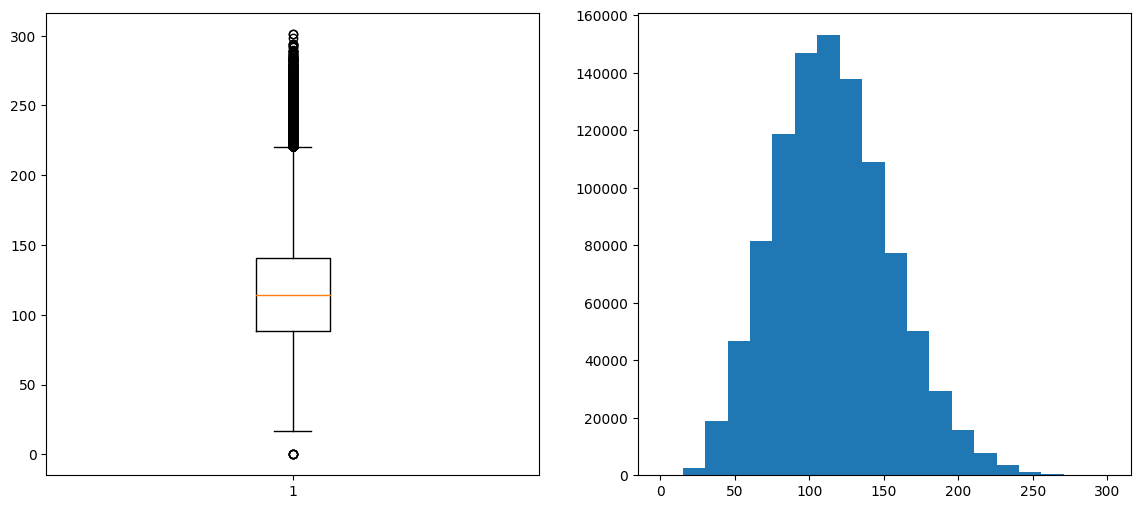

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(train_df.salary)
plt.subplot(1, 2, 2)
plt.hist(train_df.salary, bins=20)
plt.show()
warnings.filterwarnings("ignore", category=ImportWarning);

It can be seen from the boxplot that there are few outliers above and below so they need to be investigated.

In [24]:
stats = train_df.salary.describe()
print(stats)
IQR = stats["75%"] - stats["25%"]
upper = stats["75%"] + 1.5 * IQR
lower = stats["25%"] - 1.5 * IQR
print(f"The upper and lower bounds for suspected outliers are {upper} and {lower}")

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5


### Examine potential outliers

In [25]:
# Check potential outliers below lower bounds
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


From the entries in jobType and degree, it could be believed that these positions are not volunteery and the salary data is missing or corrupt, so we should remove this data from our dataframe.

In [26]:
# Check potential outliers above upper bounds
train_df.loc[train_df.salary > 222.5, "jobType"].value_counts()

,count
jobType,
CEO,2893
CFO,1308
CTO,1298
VICE_PRESIDENT,520
MANAGER,188
SENIOR,50
JUNIOR,16
JANITOR,0


In [27]:
# Check potential outliers above upper bounds
train_df[(train_df.salary > 222.5) & (train_df.jobType == "JUNIOR")]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


Even though the job type and salaries do not match together, the degree, major and the amount of experience clearly justify the salary, so we should keep them in our dataframe and do not remvoe them.

In [28]:
# remove the missing data
train_df = train_df[train_df.salary > 8.5]

### Look for correlation

In [29]:
# Find the correlation matrix
train_df.corr(numeric_only=True)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [30]:
train_df.skew(numeric_only=True)

,0
yearsExperience,0.001671
milesFromMetropolis,-0.001144
salary,0.346527


In [31]:
train_df.kurt(numeric_only=True)

,0
yearsExperience,-1.205126
milesFromMetropolis,-1.199018
salary,-0.025751


### Visualize target variable (salary)

### Visualize all features

In [32]:
def plot_attribute(train_data, col):
    '''
    Make plot for every attribute
    left plot, the distribution of samples on the attribute
    right plot, the dependance of salary on the attribute
    '''
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    if train_data[col].dtype == 'int64':
        train_data[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary in each category
        mean = train_data.groupby(col)['salary'].mean()
        #train_data[col] = train_data[col].astype('category')
        levels = mean.sort_values().index.tolist()
        #train_data[col].cat.reorder_categories(levels)
        train_data[col].value_counts().plot()

    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if train_data[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = train_data.groupby(col)['salary'].mean()
        std = train_data.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.2)
    else:
        sns.boxplot(x = col, y = 'salary', data=train_data)

    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()
warnings.filterwarnings("ignore", category=FutureWarning)

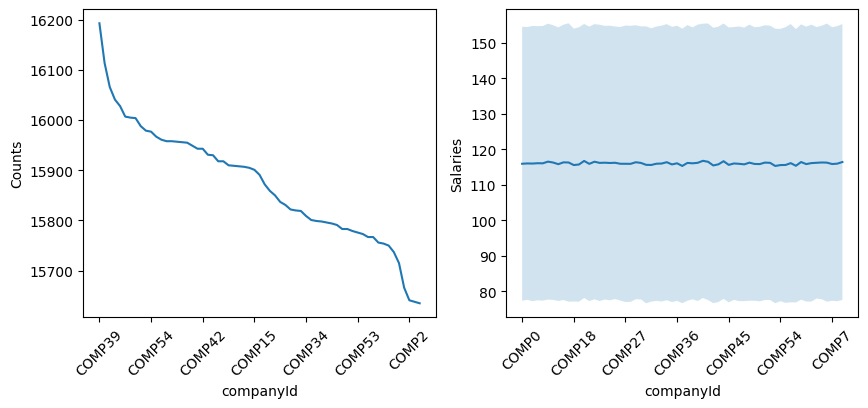

In [33]:
plot_attribute(train_df, 'companyId')

Here, it confirms that the column companyId does not provide any important pattern, so it should be dropped out.

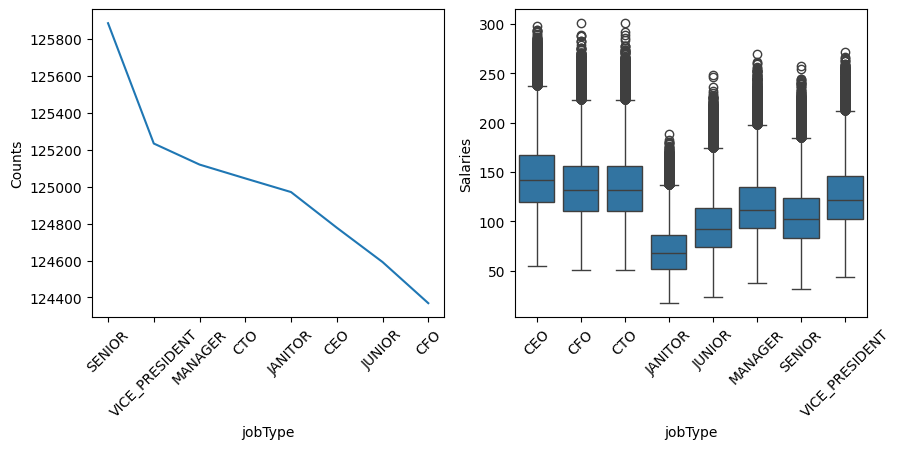

In [34]:
plot_attribute(train_df, 'jobType')

Janitors get the lowest salary, while as the level of seniority goes up, the salary increases and the CEO gets the highest salary.

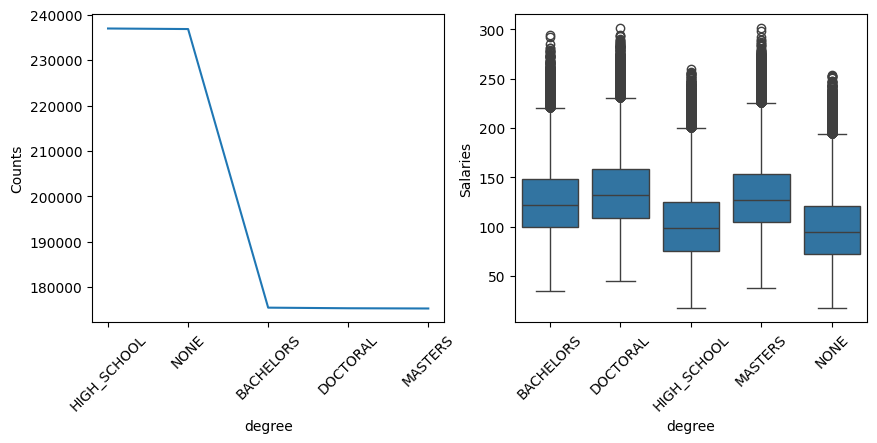

In [35]:
plot_attribute(train_df, 'degree')

People without degree or with a high school obtain the lower salaries in comparison with people who have bachelors, masters or doctoral.

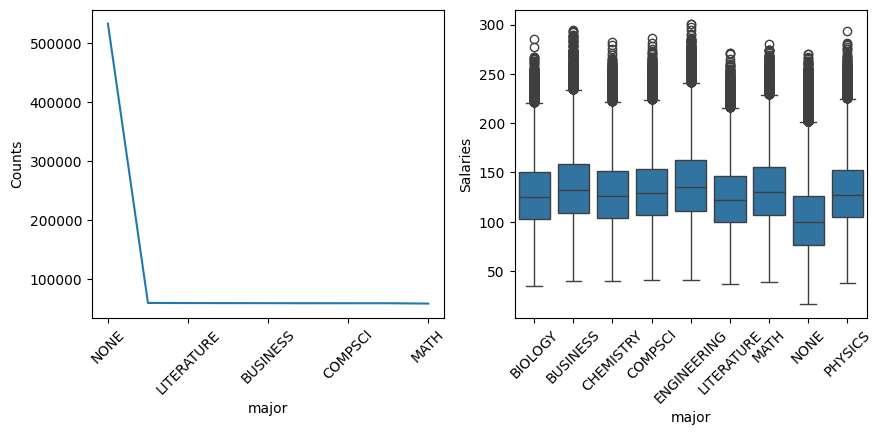

In [36]:
plot_attribute(train_df, 'major')

Employees who are major in any subject get nearly same salary. However, those without any major obtain 20% lower wages than their peers.

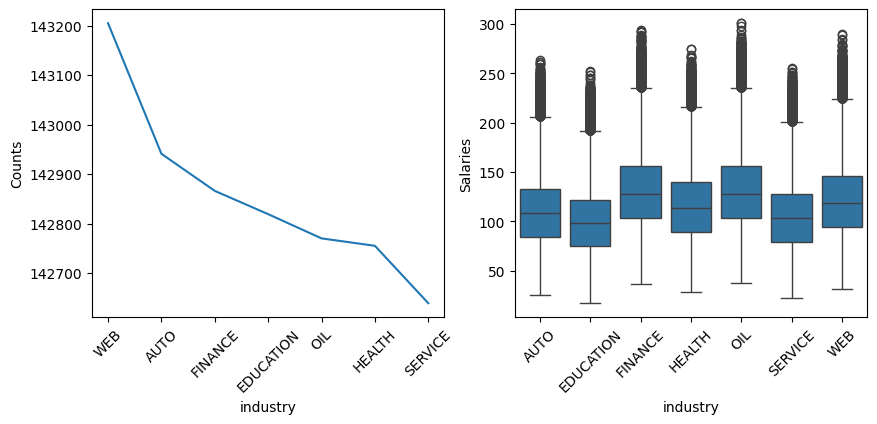

In [37]:
plot_attribute(train_df, 'industry')

The highest wages are paid in Oil and Finance industries, whereas employees in Education sector get the lowest remuneration.

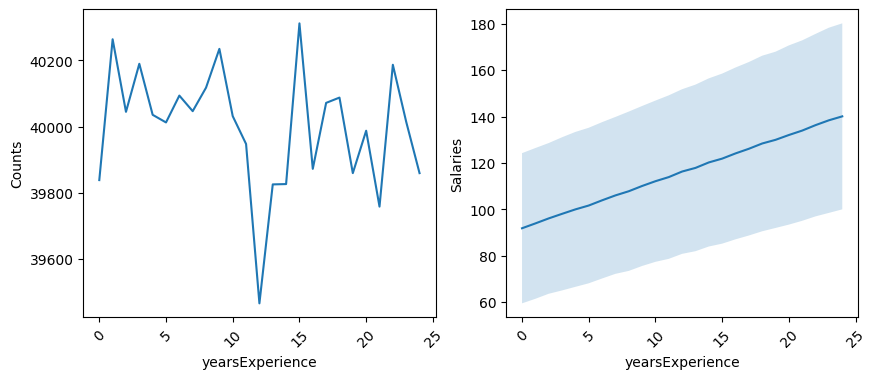

In [38]:
plot_attribute(train_df, 'yearsExperience')

The graph clearly shows that as experience increases, the amount of salary goes up.

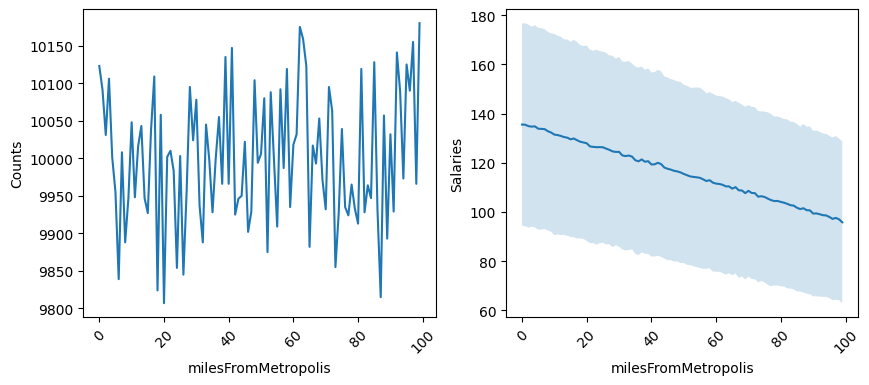

In [39]:
plot_attribute(train_df, 'milesFromMetropolis')

Here, the salary and miles from metropolis has the inverse relationship. As you live far from metro cities, your salary goes down.

### Remove jobId and companyId

In [40]:
# As they don't give any insight
train_df.drop(['jobId', 'companyId'], axis=1, inplace=True)

train_df.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### One hot encoding

In [41]:
# One hot encoding categorical data in train set
train_df = pd.get_dummies(train_df)
train_df.head()

,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,3,73,101,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,10,38,137,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,8,17,142,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,8,16,163,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


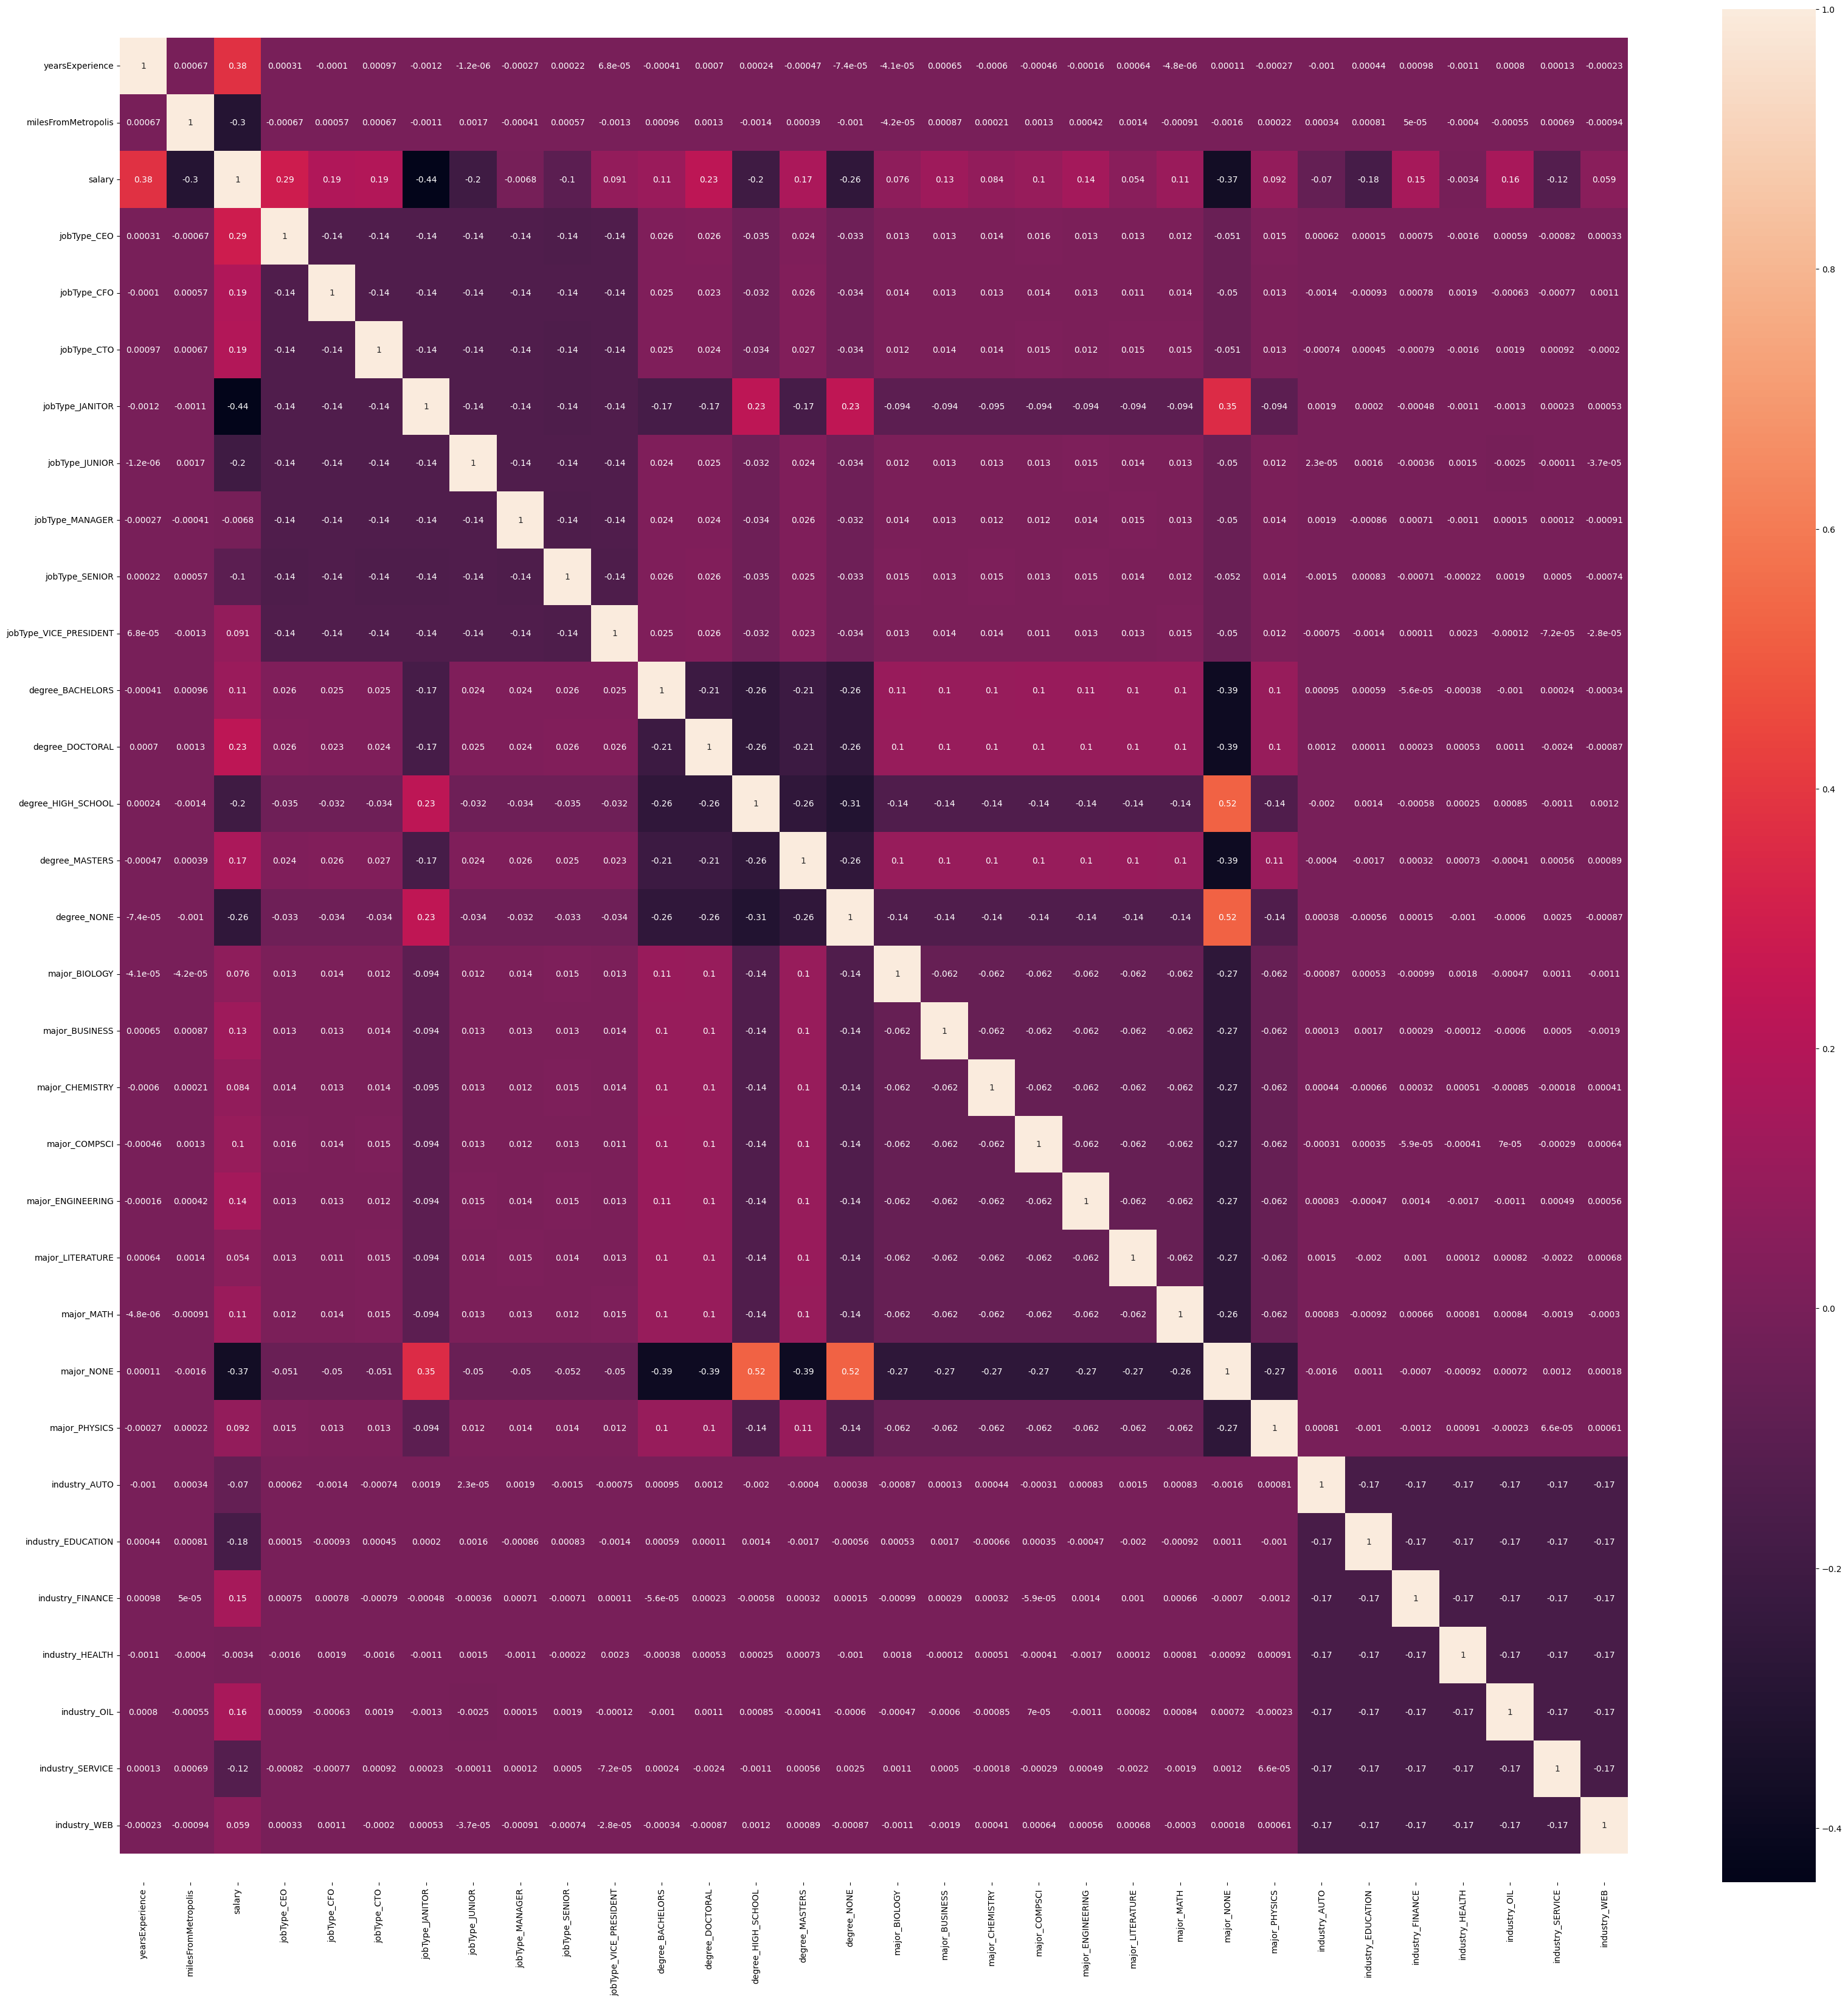

In [42]:
# Plot heatmap of all data with correlation coefficients visible
train_df_corr = train_df.corr()
plt.subplots(figsize=(40,40))
sns.heatmap(train_df_corr, cbar=True, annot=True, fmt=".2g")
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.show()

Here, the exploratory data analysis part is completed. Modeling is done in another separate notebook.